In [ ]:
import numpy as np
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
msg=pd.read_csv("/gdrive/MyDrive/file/semeval.csv")

In [ ]:
msg.head()

,Unnamed: 0,file_name,misogynous,shaming,stereotype,objectification,violence,Text Transcription
0,0,1.jpg,0,0,0,0,0,Milk Milk.zip
1,1,10.jpg,1,0,0,0,1,"ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S..."
2,2,1000.jpg,0,0,0,0,0,BREAKING NEWS: Russia releases photo of DONALD...
3,3,10000.jpg,0,0,0,0,0,MAN SEEKING WOMAN Ignad 18 O
4,4,10006.jpg,0,0,0,0,0,Me explaining the deep lore of. J.R.R. Tolkein...


In [ ]:
df=pd.DataFrame({"text": msg['Text Transcription'], 'misogynous': msg["misogynous"]})

In [ ]:
df.head()

,text,misogynous
0,Milk Milk.zip,0
1,"ROSES ARE RED, VIOLETS ARE BLUE IF YOU DON'T S...",1
2,BREAKING NEWS: Russia releases photo of DONALD...,0
3,MAN SEEKING WOMAN Ignad 18 O,0
4,Me explaining the deep lore of. J.R.R. Tolkein...,0


In [ ]:
stop_words = stopwords.words('english')
def remove_stopwords(string):
    word_list = [word.lower() for word in string.split()]
    stopwords_list = list(stopwords.words("english"))
    for word in word_list:
        if word in stopwords_list:
            word_list.remove(word)
    return ' '.join(word_list)

In [ ]:
df['text_length'] = df['text'].apply(len)
df['text'] = df['text'].map(lambda x: re.sub(r'[a-zA-Z._]+\.[a-zA-Z]+',' ',str(x)))
df['text'] = df['text'].map(lambda x: re.sub('\\n',' ',str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r'\W',' ',str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r'https\s+|www.\s+',r'', str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r'http\s+|www.\s+',r'', str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r'\s+[a-zA-Z]\s+',' ',str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r'\^[a-zA-Z]\s+',' ',str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r'\s+',' ',str(x)))
df['text'] = df['text'].str.lower()

df['text'] = df['text'].map(lambda x: re.sub(r"\’", "\'", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"won\'t", "will not", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"can\'t", "can not", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"don\'t", "do not", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"dont", "do not", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"n\’t", " not", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"n\'t", " not", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"\'re", " are", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"\'s", " is", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"\’d", " would", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"\d", " would", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"\'ll", " will", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"\'t", " not", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"\'ve", " have", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"\'m", " am", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"\n", "", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"\r", "", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"[0-9]", "digit", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"\'", "", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r"\"", "", str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r'[?|!|\'|"|#]',r'', str(x)))
df['text'] = df['text'].map(lambda x: re.sub(r'[.|,|)|(|\|/]',r' ', str(x)))
df['text'] = df['text'].apply(lambda x: remove_stopwords(x))
df.head(10)

,text,misogynous,text_length
0,milk,0,13
1,roses red violets blue say yes just rape you,1,86
2,breaking news russia releases photo donald tru...,0,128
3,man seeking woman ignad would would,0,28
4,explaining deep lore tolkein world arda prosti...,0,135
5,pictophle app straight white malle starts talk...,0,560
6,chinese restaurant faces closure would would y...,0,183
7,were chosen one were meant destroy downvoters ...,0,93
8,would would would would would pm pull start di...,1,119
9,scientists discovered there intelligent dna lo...,1,125


In [ ]:
!pip install sentence-transformers
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer('sentence-transformers/sentence-t5-base')
mpnet_model = SentenceTransformer('sentence-transformers/all-mpnet-base-v1')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
texttransform=mpnet_model.encode(df['text'])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train , X_test , y_train , y_test = train_test_split (texttransform, df['misogynous'] , test_size = 0.20 , random_state = 0 )

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
classifier=Sequential()
classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = 768))
# Adding the second hidden layer
classifier.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train,y_train, batch_size = 10, epochs = 10)

Epoch 1/10
800/800 [==============================] - 3s 3ms/step - loss: 0.5925 - accuracy: 0.7065
Epoch 2/10
800/800 [==============================] - 2s 3ms/step - loss: 0.4846 - accuracy: 0.7684
Epoch 3/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4712 - accuracy: 0.7819
Epoch 4/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4641 - accuracy: 0.7822
Epoch 5/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4601 - accuracy: 0.7854
Epoch 6/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4546 - accuracy: 0.7916
Epoch 7/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4479 - accuracy: 0.7952
Epoch 8/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4412 - accuracy: 0.7946
Epoch 9/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4337 - accuracy: 0.8002
Epoch 10/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4251 - accuracy: 0.8058

63/63 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1019
           1       0.77      0.76      0.77       981

    accuracy                           0.77      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.77      0.77      0.77      2000



Text(0.5, 15.0, 'Predicted label')

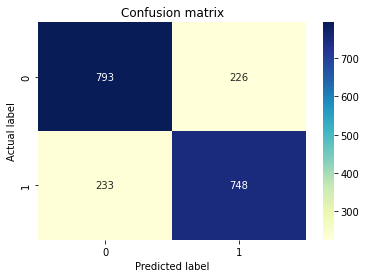

In [ ]:
y_pred = classifier.predict(X_test)
y_pred=y_pred>.5
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Epoch 1/10
800/800 [==============================] - 5s 4ms/step - loss: 0.5439 - accuracy: 0.7327
Epoch 2/10
800/800 [==============================] - 3s 4ms/step - loss: 0.4771 - accuracy: 0.7774
Epoch 3/10
800/800 [==============================] - 3s 4ms/step - loss: 0.4654 - accuracy: 0.7834
Epoch 4/10
800/800 [==============================] - 3s 4ms/step - loss: 0.4573 - accuracy: 0.7825
Epoch 5/10
800/800 [==============================] - 3s 4ms/step - loss: 0.4472 - accuracy: 0.7890
Epoch 6/10
800/800 [==============================] - 3s 4ms/step - loss: 0.4404 - accuracy: 0.7900
Epoch 7/10
800/800 [==============================] - 3s 4ms/step - loss: 0.4319 - accuracy: 0.7958
Epoch 8/10
800/800 [==============================] - 3s 4ms/step - loss: 0.4236 - accuracy: 0.8001
Epoch 9/10
800/800 [==============================] - 3s 4ms/step - loss: 0.4163 - accuracy: 0.8071
Epoch 10/10
63/63 [==============================] - 1s 2ms/step
              precision    recall  

Text(0.5, 15.0, 'Predicted label')

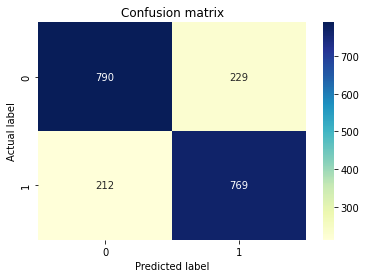

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM,Bidirectional,Dropout
from keras.layers import CuDNNLSTM


X=X_train.reshape(X_train.shape[0],1,X_train.shape[1])
model=Sequential()
model.add(Bidirectional(CuDNNLSTM(units = 20, kernel_initializer = 'uniform', input_shape = (1,X_train.shape[1]))))
# Adding the second hidden layer
model.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model.fit(X, y_train, batch_size = 10, epochs = 10)
y_pred = model.predict(X_test.reshape(X_test.shape[0],1,X_train.shape[1]))
y_pred = (y_pred > 0.5)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')